## Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [2]:
import pandas as pd
import statsmodels.api as sm
# api submodule gives access to the most commonly used 
# classes and functions directly.

2. Import Default dataset

In [3]:
default = pd.read_csv("Default.csv")

In [4]:
default.shape

(10000, 4)

In [5]:
default.head()
default.tail()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


,default,student,balance,income
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365
9999,No,Yes,200.922183,16862.952321


In [6]:
default.value_counts()

default  student  balance      income      
No       No       0.000000     10593.921246    1
                  1612.465315  42281.231140    1
                  1608.818447  36721.103483    1
                  1609.297031  52752.968425    1
                  1609.698815  60123.627302    1
                                              ..
                  724.243806   43399.718282    1
                  724.537790   33254.528495    1
                  724.887324   27800.952377    1
                  725.120500   47549.200750    1
Yes      Yes      2654.322576  21930.388879    1
Length: 10000, dtype: int64

In [7]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


<Figure size 1000x600 with 0 Axes>

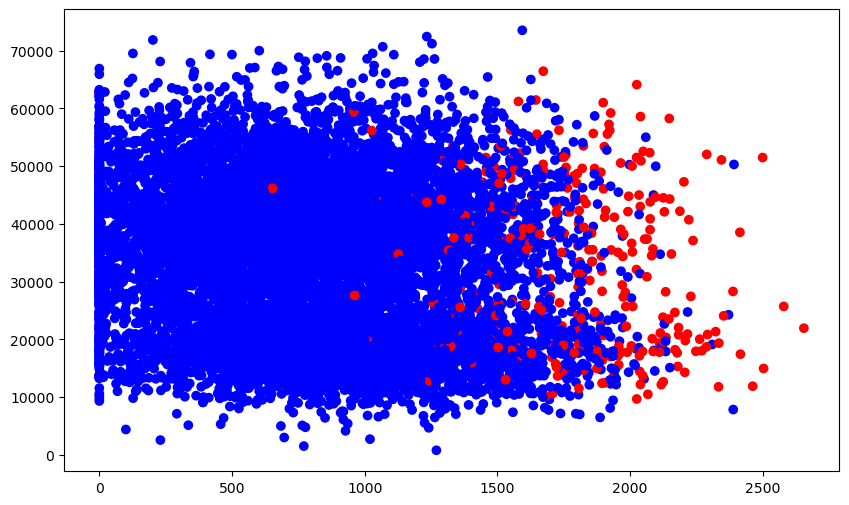

In [8]:
import matplotlib.pyplot as plt
colors = {'No':'blue', 'Yes':'red'}
plt.figure(figsize=(10,6))
plt.scatter(default['balance'], default['income'], c=default['default'].map(colors))

<Axes: xlabel='balance', ylabel='income'>

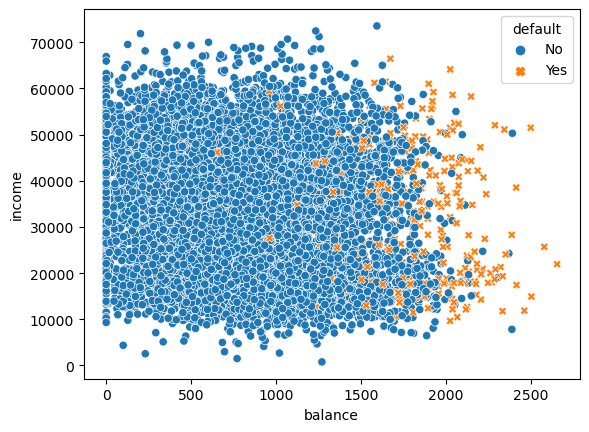

In [9]:
import seaborn as sns
sns.scatterplot(data = default, x = default['balance'], y = default['income'], hue = default['default'], style = default['default'] )

In [10]:
# We first need to prepare the data for analysis

In [11]:
#use patsy library to prepare design matrices
import patsy
y, x = patsy.dmatrices('default ~ balance + income + student', data = default, return_type = 'dataframe')

In [12]:
y.head()
x.head()

,default[No],default[Yes]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [13]:
y.columns
x.columns

Index(['default[No]', 'default[Yes]'], dtype='object')

Index(['Intercept', 'student[T.Yes]', 'balance', 'income'], dtype='object')

In [19]:
#Fit a single variable model - balance
logit_model_1 = sm.Logit(y['default[Yes]'], x[['Intercept','balance']])
logit_res_1 = logit_model_1.fit()
logit_res_1.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.4534
Time:                        14:39:06   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
#Make probability predictions using the balance model
#if balance = 1000, then what is the probability of default

b1000 = pd.DataFrame({'Intercept' : [1], 'balance' : [1000]})

In [23]:
b1000

,Intercept,balance
0,1,1000


In [24]:
pred_b1000 = logit_res_1.predict(b1000)
pred_b1000

0    0.005752
dtype: float64

In [29]:
#the odds
pred_b1000/(1-pred_b1000)

0    0.005785
dtype: float64

In [25]:
#increase balance by 100
b1100 = pd.DataFrame({'Intercept' : [1], 'balance' : [1100]})
pred_b1100 = logit_res_1.predict(b1100)
pred_b1100

0    0.009927
dtype: float64

In [30]:
#the odds
pred_b1100/(1-pred_b1100)

0    0.010027
dtype: float64

In [26]:
#defining odds_ratio function and passing 2 probabilites
def odds_ratio(p1,p2):
    return (p2/(1-p2))/(p1/(1-p1))

In [27]:
odds_ratio(pred_b1000, pred_b1100)

0    1.733065
dtype: float64

In [28]:
import math
math.exp(0.55)

1.7332530178673953

In [31]:
x.head()

,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [33]:
#Fit a single variable model - student
logit_model_2 = sm.Logit(y['default[Yes]'], x[['Intercept','student[T.Yes]']])
logit_res_2 = logit_model_2.fit()
logit_res_2.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                0.004097
Time:                        15:24:05   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [34]:
math.exp(0.4049)

1.4991525773030239

In [35]:
#Fit a full model
logit_model_full = sm.Logit(y['default[Yes]'], x)
logit_res_full = logit_model_full.fit()
logit_res_full.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.4619
Time:                        15:36:38   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
#make classification
#get the predicted probabilities

pred_prob = logit_res_full.predict(x)
pred_prob

0       0.001429
1       0.001122
2       0.009812
3       0.000442
4       0.001936
          ...   
9995    0.001323
9996    0.001560
9997    0.002896
9998    0.147144
9999    0.000033
Length: 10000, dtype: float64

In [45]:
#Classify based on a threshold
pred_classification = (pred_prob > 0.5).astype(int)

In [46]:
pred_classification

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32